In [2]:
import sys
sys.path.append("..")  # add parent folder so the dyadic_pcm folder can be found

from dyadic_pcm.data import prepare_data
from dyadic_pcm.run import fit_model

import pandas as pd
import arviz as az

In [3]:
# Load raw data
df = pd.read_csv("./dyadic_irt_data.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39773 entries, 0 to 39772
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   actor        39773 non-null  int64
 1   partner      39773 non-null  int64
 2   item         39773 non-null  int64
 3   x            39773 non-null  int64
 4   unique.pair  39773 non-null  int64
 5   selector     39773 non-null  int64
 6   male         39773 non-null  int64
 7   decision     39773 non-null  int64
 8   pair         39773 non-null  int64
 9   match.pair   39773 non-null  int64
 10  dpair        39773 non-null  int64
dtypes: int64(11)
memory usage: 3.3 MB


In [4]:
# Prepare data for modeling
data_dict = prepare_data(df)
print(data_dict.keys())

dict_keys(['I', 'A', 'U', 'N', 'M', 'aa', 'pp', 'ii', 'x', 'dd', 'mm'])


In [5]:
# Estimate model parameters (this will take a while to run)
# Note that the Stan implementation used much higher warm-up and sample counts
model = fit_model(
    data_dict, 
    seed=12345, 
    num_warmup=100,
    num_samples=400,
    num_chains=2, 
    thinning=5,      
    chain_method="sequential"
)

sample: 100%|██████████| 500/500 [01:20<00:00,  6.24it/s, 63 steps of size 9.06e-02. acc. prob=0.90] 


In [6]:
# Print summaries
params = ["sigmaA", "sigmaB", "sigmaG", "rhoAB", "rhoG"]
idata = az.from_numpyro(model)
az.summary(idata, var_names=params, hdi_prob=0.95)

,mean,sd,hdi_2.5%,hdi_97.5%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
sigmaA,1.050,0.037,0.979,1.117,0.003,0.003,160.0,143.0,0.99
sigmaB,0.705,0.026,0.656,0.753,0.002,0.001,143.0,108.0,1.01
sigmaG,0.884,0.014,0.861,0.914,0.001,0.001,130.0,99.0,1.02
rhoAB,0.040,0.048,-0.061,0.114,0.004,0.004,153.0,141.0,1.02
rhoG,0.350,0.027,0.296,0.396,0.002,0.002,131.0,139.0,1.01


array([[<Axes: title={'center': 'sigmaA'}>,
        <Axes: title={'center': 'sigmaA'}>],
       [<Axes: title={'center': 'sigmaB'}>,
        <Axes: title={'center': 'sigmaB'}>],
       [<Axes: title={'center': 'sigmaG'}>,
        <Axes: title={'center': 'sigmaG'}>],
       [<Axes: title={'center': 'rhoAB'}>,
        <Axes: title={'center': 'rhoAB'}>],
       [<Axes: title={'center': 'rhoG'}>,
        <Axes: title={'center': 'rhoG'}>]], dtype=object)

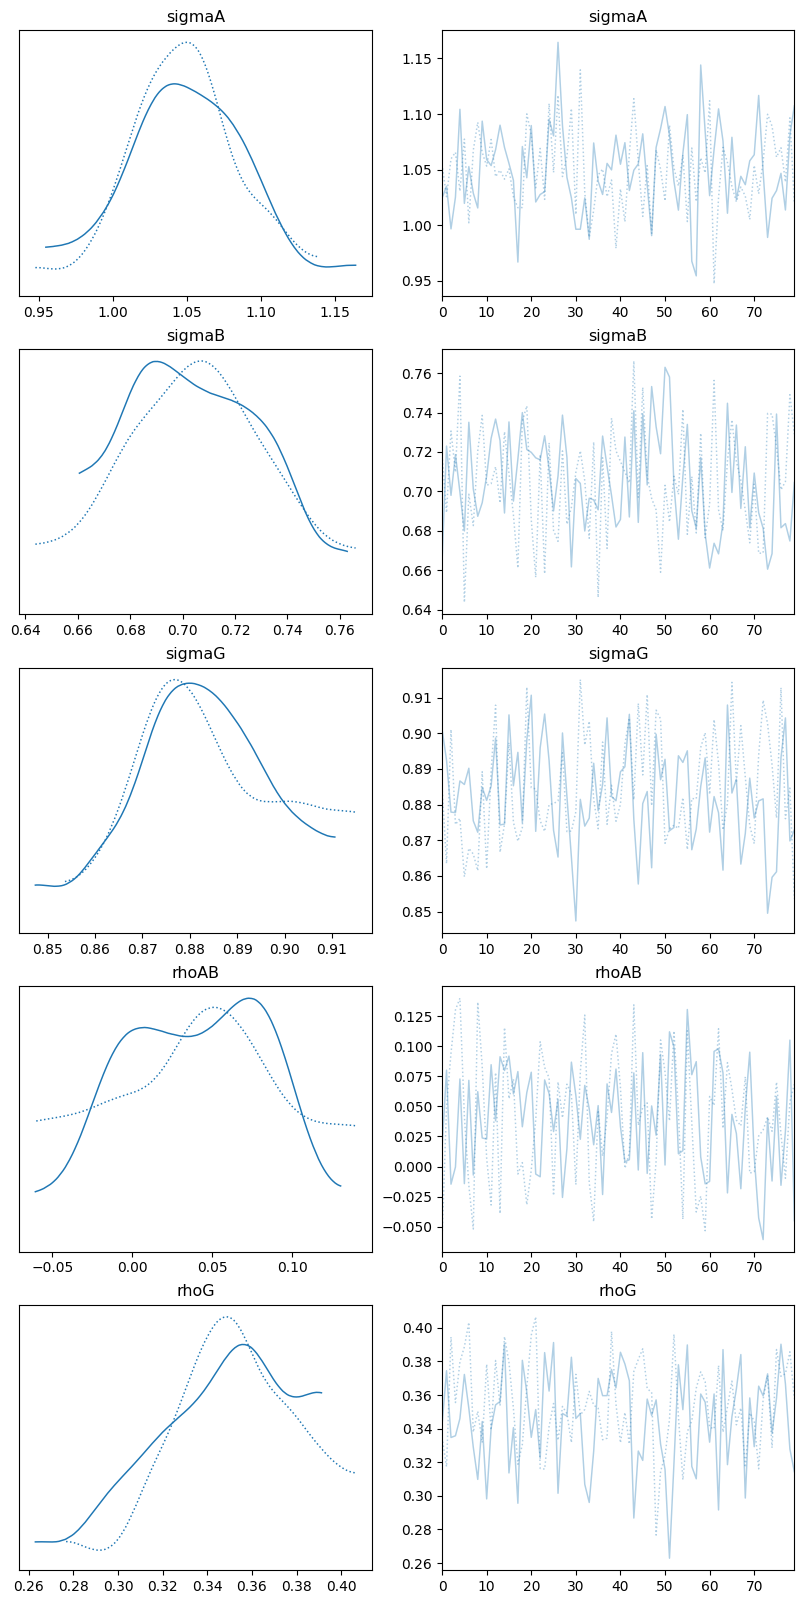

In [7]:
# Plot traces 
az.plot_trace(idata, var_names=params, figsize=(10, 20))